# DSC320 - Week 2 - Exercise 2.2

## Scatter Plots and Linear Regression

We will begin this week's exercise by importing the required libraries for the assignment

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
import sklearn

**1. Make a scatterplot of the highway miles per gallon (y-axis) versus the weight (x-axis).**

1. Read the .csv file that was provided for the assignment for the columns.

In [2]:
data = pd.read_csv(r'C:\Users\thefli0\Downloads\week2data\week2data\car_data.csv')

2. Use an 'if statement' to ensure that the appropriate columns are read and generate the scatterplot per specifications. An exception can also be written to generate an error if the appropriate columns are not located.

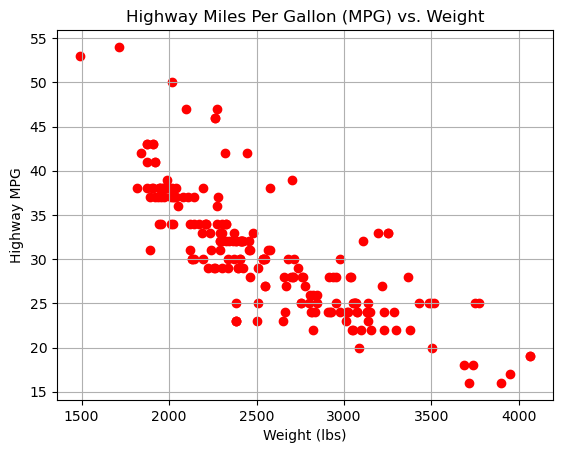

In [3]:
if 'hwy_mpg' in data.columns and 'weight' in data.columns:
  plt.scatter(data['weight'], data['hwy_mpg'], color='red')
  plt.xlabel('Weight (lbs)')
  plt.ylabel('Highway MPG')
  plt.title('Highway Miles Per Gallon (MPG) vs. Weight')
  plt.grid(True)
  plt.show()
else:
  print("Error: 'weight' and 'hwy_mpg' columns not found in the data.")

***

**2. Based on your plot, what is the general trend of how highway miles per gallon varies with the weight?**

1. Based on the above plot, the general insight that can be gleaned is that as the weight (in lbs) increases for a vehicle, the miles per gallon (mpg) decreases.

***

**3. If you were to build a linear model using this data to predict highway miles per gallon from weight,
would you expect the slope to be positive or negative? Explain**.

1. The above relationship can be described as "inversely proportional". To further expand on this, as the weight of a vehicle increases, the highway mpg decreases. As a linear model, this relationship would be conveyed as a negative slope; this negative slope indicates that the two variables move in opposite directions: as one increases, the other decreases. 

***

**4. If the slope of a linear model predicting highway miles per gallon from the weight, interpret the meaning
of the slope being −0.05**.

1. In the context of a linear model, a slope of -0.05 would indicate that for every one-unit increase in weight (lbs), the highway mpg would decrease by 0.05 miles per gallon. The quantifies the rate at which fuel efficency decreases based on the weight increase of a vehicle. 

***

**5. Write code to add a line to the graph you made in problem (1). Adjust the slope and y-intercept of this
line until you think you have found the line that best fits the data. Record the slope and y-intercept**.

1. Use an 'if statement' to check for the necessary columns and extract what is relevant for the dataset.

In [4]:
if 'hwy_mpg' in data.columns and 'weight' in data.columns:
    x = data['weight']
    y = data['hwy_mpg']

2. Fit a linear model to the data, re-create a scatterplot (labels will be added in a later step), and add the line of best fit.

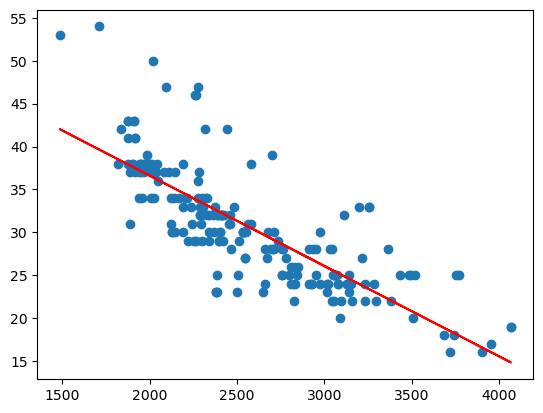

In [5]:
slope, intercept = np.polyfit(x, y, 1)
plt.scatter(x , y)
plt.plot(x, slope * x + intercept, 'r-')

3. Annotate the plot with the slope and y-intercept.

Text(4066, 54, 'Slope: -0.01\nIntercept: 57.71')

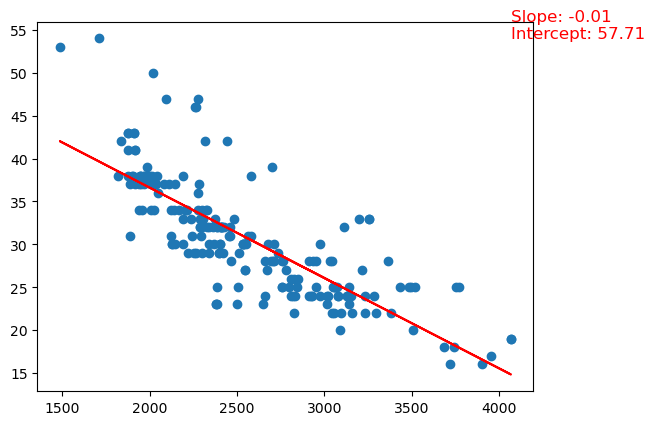

In [6]:
slope, intercept = np.polyfit(x, y, 1)
plt.scatter(x , y)
plt.plot(x, slope * x + intercept, 'r-')
plt.text(x.max(), y.max(), f'Slope: {slope:.2f}\nIntercept: {intercept:.2f}', color='red', fontsize=12)

4. Add various labels back in and include the exception when reading the csv file. You will also notice that the 'ha' and 'va' parameters were included. These set text alignment to prevent text from moving outside of the frame.

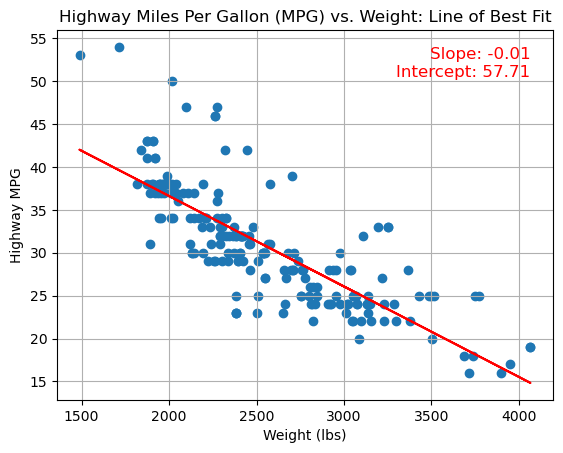

In [7]:
slope, intercept = np.polyfit(x, y, 1)
plt.scatter(x , y)
plt.plot(x, slope * x + intercept, 'r-')
plt.text(x.max(), y.max(), f'Slope: {slope:.2f}\nIntercept: {intercept:.2f}', ha='right', va='top', color='red', fontsize=12)

plt.title("Highway Miles Per Gallon (MPG) vs. Weight: Line of Best Fit")
plt.xlabel("Weight (lbs)")
plt.ylabel("Highway MPG")
plt.grid(True)
plt.show()

5. According to the information above, after implementation of the line of best fit:
   * Slope is: -0.01
   * y-intercept is: 57.71

***

**6. Use Python to find the best-fit line. The Scikit-learn package is a good choice to use for this.**

1. Having previously imported the Scikit-Learn library, we now want to call the function specific to Linear Regression.

In [8]:
from sklearn.linear_model import LinearRegression

2. After this, we will prepare the data for modeling and begin by fitting the linear regression model.

In [9]:
if 'hwy_mpg' in data.columns and 'weight' in data.columns:
  x = data[['weight']]
  y = data['hwy_mpg']

  model = LinearRegression()
  model.fit(x, y)

3. Use the following to capture the slope and intercept of the line.

In [10]:
  slope = model.coef_[0]
  intercept = model.intercept_

4. Finally, create the scatterplot with the data, adding the line of best fit, and annotating the plot with the slope and y-intercept. We will again add the labels back for ease of readability.

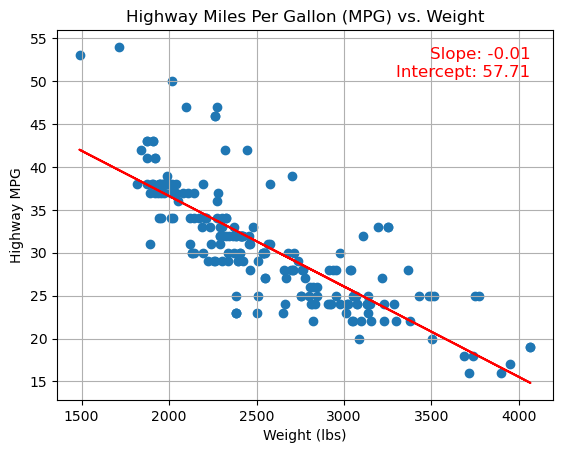

In [11]:
  plt.scatter(x, y)
  plt.plot(x, model.predict(x), 'r-')
  plt.text(x.max(), y.max(), f'Slope: {slope:.2f}\nIntercept: {intercept:.2f}', ha='right', va='top', color='red', fontsize=12)
  plt.xlabel('Weight (lbs)')
  plt.ylabel('Highway MPG')
  plt.title('Highway Miles Per Gallon (MPG) vs. Weight')
  plt.grid(True)
  plt.show()

5. According to the information above, utilizing the Scikit-Learn library, we ascertained the following:
   * Slope is: -0.01
   * y-intercept is: 57.71

***

**7. Find the root mean squared error (RMSE) of the prediction line you found in problem (4) and the
actual best-fit line found in problem (5). How do these compare**?

**-Part 1-**

1a. For this question, there are two different models to look at. In Question 4, we are given the slope. Using this information, we can begin. We will use the given slope and assume a random intercept for proof of concept.

In [12]:
intercept = 40
slope = -0.05

2a. We will again use an 'if statement' to ensure that the columns exist in the csv file and compute the predicted (y) values.

In [13]:
if 'hwy_mpg' in data.columns and 'weight' in data.columns:
    predicted_hwy_mpg = slope * data['weight'] + intercept

3a. Now that we have a structure for finding these values, we can calculate the differences between the actual and predicted values.

In [14]:
    residuals = data['hwy_mpg'] - predicted_hwy_mpg

4a. Finally, we can calculate the RMSE and display the results.

In [15]:
mse = np.mean(residuals**2)
rmse = np.sqrt(mse)

print(f"The RMSE of the model is: {rmse:.2f}")

The RMSE of the model is: 120.36


**-Part 2-**

1b. The second part of this question looks at the line of best fit from Question 5. Using the information that we found while creating this plot, we will again calculate the RMSE. Using Scikit-Learn this time, we will utilize the function for mean squared error (MSE) so we need to import this function.

In [22]:
from sklearn.metrics import mean_squared_error

2b. We again check for the necessary columns and prepare the data for modeling.

In [17]:
if 'hwy_mpg' in data.columns and 'weight' in data.columns:
    x = data[['weight']]
    y = data['hwy_mpg']

3b. Now, we will fit the linear regression model (precisely how we did earlier), predict the values, and use the values generated to calculate the RMSE.

In [18]:
    model = LinearRegression()
    model.fit(x, y)

    predictions = model.predict(x)

    rmse = np.sqrt(mean_squared_error(y, predictions))

4b. Using our previous work, we will determine the slope and y-intercept of the line, generate our scatterplot, and add the line of best fit along with other relevant information.

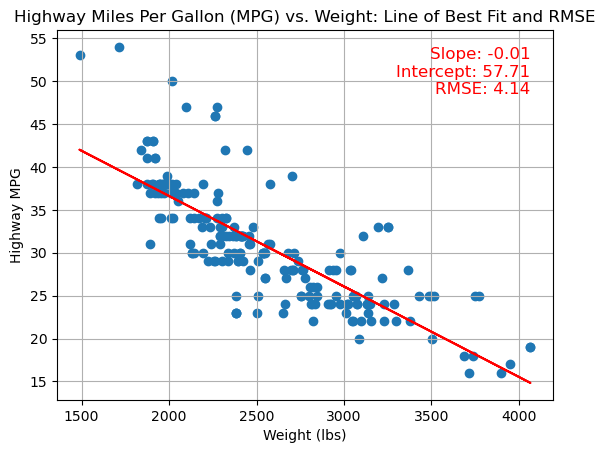

In [19]:
    slope = model.coef_[0]
    intercept = model.intercept_

    plt.scatter(x, y)
    plt.plot(x, model.predict(x), 'r-')
    plt.text(x.max(), y.max(), f'Slope: {slope:.2f}\nIntercept: {intercept:.2f}\nRMSE: {rmse:.2f}', ha='right', va='top', color='red', fontsize=12)
    plt.xlabel('Weight (lbs)')
    plt.ylabel('Highway MPG')
    plt.title('Highway Miles Per Gallon (MPG) vs. Weight: Line of Best Fit and RMSE')
    plt.grid(True)
    plt.show()

5. Bearing in mind that a lower RMSE value indicates a model that makes more accurate predictions and fits the data well, the technique in **-Part 2-** with an RMSE of *4.14* would be preferrable to the technique in **-Part 1-** which yielded an RMSE of *120.36*   

***

**8. Use the best-fit line in problem (5) to predict the highway mpg of a car that weighs 3200 pounds.**

1. Since the majority of the information exists in the notebook already, we only need to define a calculation for predicted mpg based on a value for weight.

In [24]:
vehicle_weight = 3200
predicted_mpg = model.predict([[vehicle_weight]])
print(f"The predicted highway mpg for a vehicle weighing {vehicle_weight} lbs is: {predicted_mpg[0]:.2f}")

The predicted highway mpg for a vehicle weighing 3200 lbs is: 23.95


2. A message is displayed to the user informing them that based on input information and the model predictions, a vehicle weighin 3200 lbs would have a predicted highway mpg of 23.95 mpg.